In [1]:
import numpy as np

# Line search algorithm

In [2]:
def lineSearch(obj, x, d, alpha0, beta1, beta2, lbd = 2):
    """
    :param obj: function returning the value of the objective function and its gradient.
    :type obj: f, g = fct(x)
    
    :param x: point where the line search starts.
    :type x: numpy array
    
    :param d: direction along which the line search is performed.
    :type d: numpy array (size dimension as x)
    
    :param alpha0: first trial for the step
    :type alpha0: float. Must be positive. 
    
    :param beta1: parameter for the first Wolfe condition. 
    :type beta1: float. Must be strictly between 0 and 1.
    
    :param beta2: parameter for the second Wolfe condition. 
    :type beta2: float. Must be strictly between 0 and 1, and beta2 > beta1.
    
    """
    if  lbd <= 1:
        raise Exception(f'lambda is {lbd} and must be > 1')
    if  alpha0 <= 0:
        raise Exception(f'alpha0 is {alpha0} and must be > 0')
    if beta1 <= 0 or beta1 >= 1:
         raise Exception(f'beta1 = {beta1} must be strictly between 0 and 1')
    if beta2 >= 1:
         raise Exception(f'beta2 = {beta2} must be strictly lesser than 1')       
    if  beta1 >= beta2:
        raise Exception(f'Incompatible Wolfe cond. parameters: beta1={beta1} is greater or equal than beta2={beta2}')
        
    f, g = obj(x)
    deriv = np.inner(g,d)
    if deriv >= 0:
        raise Exception(f'd is not a descent direction: {deriv} >= 0')
    i = 0
    alpha = alpha0
    # The lower bound alphal is initialized to 0.
    alphal = 0
    # The upper bound alphar is initialized to "infinity", that is, the largest floating point number
    # representable in the machine. 
    alphar = np.finfo(np.float64).max
    finished = False
    iters = list()
    while not finished:
        xnew = x + alpha * d
        fnew, gnew = obj(xnew)
        # First Wolfe condition
        if fnew > f + alpha * beta1 * deriv:
            reason = "too long"
            alphar = alpha ;
            alpha = (alphal + alphar) / 2.0
        # Second Wolfe condition
        elif np.inner(gnew, d) < beta2 * deriv:
            reason = "too short"
            alphal = alpha 
            if alphar == np.finfo(np.float64).max:
                alpha = lbd * alpha 
            else:
                alpha = (alphal + alphar) / 2.0
        else:
            reason = "ok"
            finished = True
        iters.append([alpha, alphal, alphar, reason])
    return alpha, iters

# Steepest descent algorithm

In [3]:
def steepestDescent(obj, x0, eps, maxiter = 100):
    """
    :param obj: function returning the value of the objective function and its gradient.
    :type obj: f, g = fct(x)
    
    :param x0: starting point
    :type x: numpy array
    
    :param eps: requested precision
    :type eps: float
    
    :param maxiter: maximum number of iterations
    :type maxiter: int
    """
    xk = x0
    f, g = obj(xk)
    iters = list()
    iters.append([xk, f, np.linalg.norm(g)])
    k = 0
    while np.linalg.norm(g) > eps and k < maxiter:
        alpha, lsiters = lineSearch(obj, xk, -g, alpha0 = 1.0, beta1 = 1.0e-4, beta2 = 0.99)
        xk = xk - alpha * g ;
        f, g = obj(xk)
        k += 1
        iters.append([xk, f, np.linalg.norm(g)])
    return xk, iters

# Rosenbrock function 

The Rosenbrock function is defined as \\[ f(x_1, x_2) = 100 (x_2-x_1^2)^2 + (1-x_1)^2.\\]
It can be verified that the minimum is \\[ x^* = (1, 1)^T \\]

In [4]:
def Rosenbrock(x):
    f = 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
    g = np.array([-400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0]), 200 * (x[1] - x[0]**2)])
    return f, g

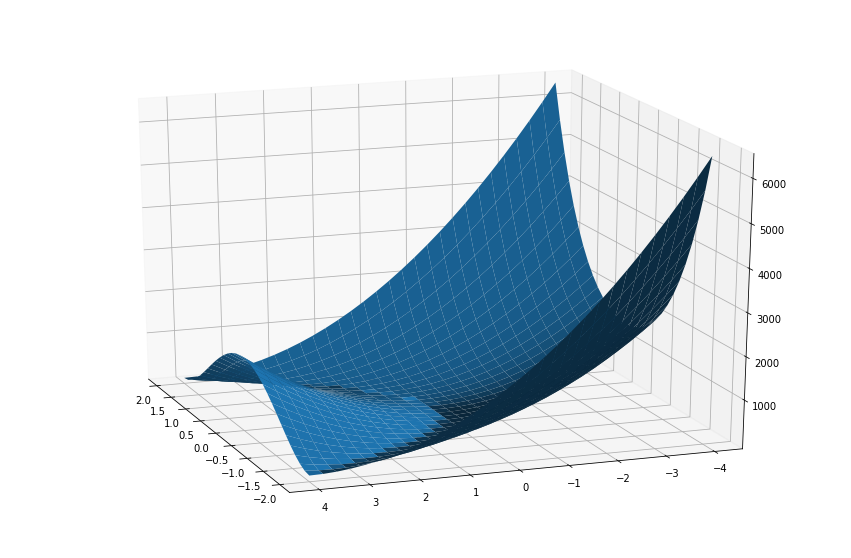

In [5]:
def fct(x, y):
    f, g = Rosenbrock(np.array([x, y]))
    return f

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [15, 10]
from mpl_toolkits.mplot3d import axes3d
meshx = np.linspace(-2, 2, 30)
meshy = np.linspace(-4, 4, 30)
X, Y = np.meshgrid(meshx, meshy)
Z = fct(X, Y)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.view_init(20, 160)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='none')
plt.show()

# Optimization

In [6]:
x0 = np.array([-1.5, 1.5])
eps = 1.0e-7
sol, iters = steepestDescent(Rosenbrock, x0, eps, 10000)
print(f'The optimal solution is {sol} and is reached after {len(iters)-1} iterations.')
fopt, gopt = Rosenbrock(sol)
print(f'f(x*)={fopt}, ||g(x*)||={np.linalg.norm(gopt)}')

The optimal solution is [0.99996357 0.99992709] and is reached after 10000 iterations.
f(x*)=1.3273276690842496e-09, ||g(x*)||=5.0517894826899174e-05


Note that the required precision has not been reached after 10000 iterations.

## Plot the iterations on the contours

In [7]:
def plotIterations(xmin, xmax, ymin, ymax):
    xlist = np.linspace(xmin, xmax, 1000)
    ylist = np.linspace(ymin, ymax, 1000)
    X, Y = np.meshgrid(xlist, ylist)
    Z = fct(X, Y)
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.contour(X, Y, Z, 20)
    xiter = [iters[k][0][0] for k in range(200)]
    yiter = [iters[k][0][1] for k in range(200)]
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.plot(xiter,yiter, linewidth=1, color='r')
    plt.plot(1,1,marker='*')
    plt.show()

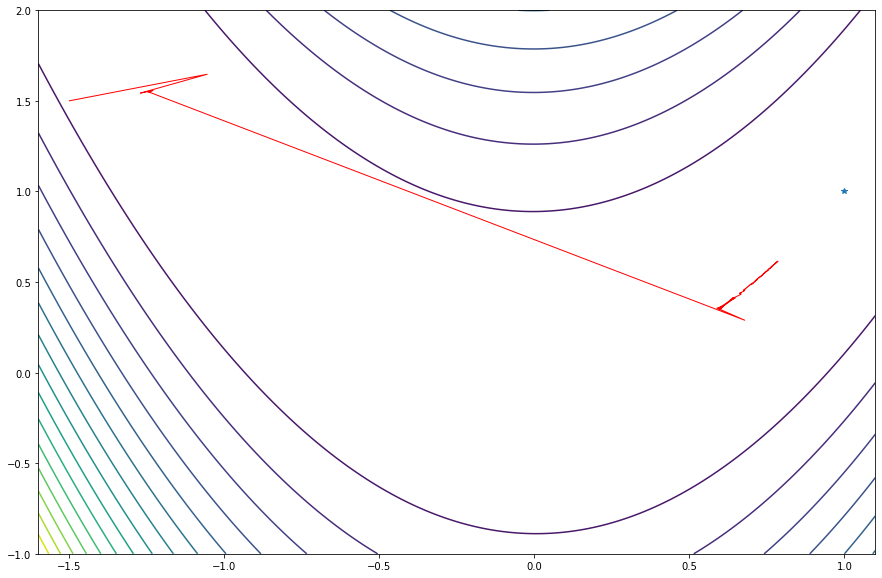

In [8]:
plotIterations(-1.6, 1.1, -1, 2) 

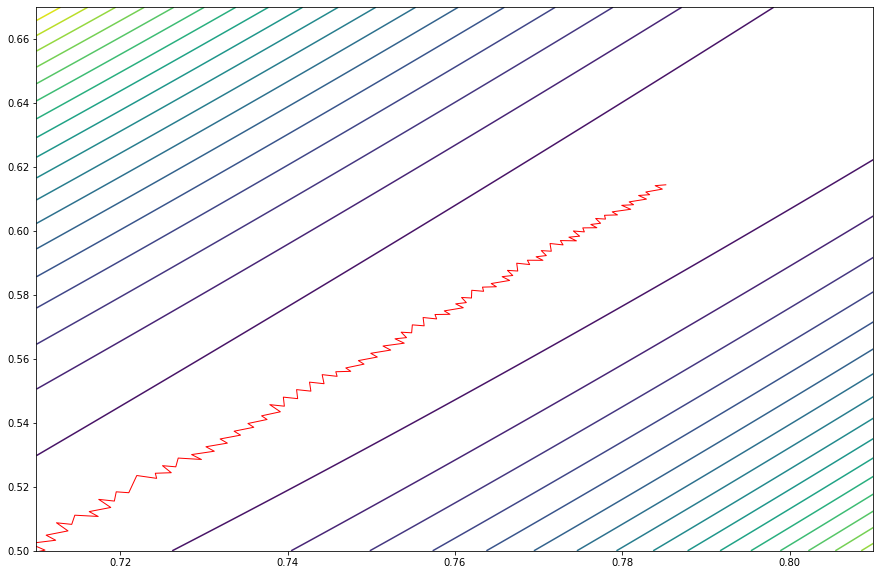

In [9]:
plotIterations(0.71, 0.81, 0.5, 0.67) 

We observe on the above plot the typical zigzagging of the iterations of the steepest descent algorithm.